# Logistic Regression
-----
This section tries LogisticRegression on the problem in the hand. This the first classifier being tried upon. This classifier will be used to develop the required infrastructure.

In [20]:
# First thing first - bring necessary modules in
%matplotlib inline
# a utility project level module for
# loading samples and plotting data
import project_utils as pu
# a utility project level module
# for classification
import model_utils as mu
# numpy and pandas
import numpy as np
import pandas as pd
# plots
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
# sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
# Load sample with 50-50 (pos-neg) balance
df_50 = pu.sample_data(num_samples_per_bin=100, frac_pos=0.5)
# Load sample with 33-66 (pos-neg) balance
df_33 = pu.sample_data(num_samples_per_bin=100, frac_pos=0.33)
# Load sample with 20-80 (pos-neg) balance
df_20 = pu.sample_data(num_samples_per_bin=100, frac_pos=0.2)

In [29]:
# Workout X and y for different samples
X50 = df_50[pu.x_columns].values
y50 = (df_50.click > 0).values
X33 = df_33[pu.x_columns].values
y33 = (df_33.click > 0).values
X20 = df_20[pu.x_columns].values
y20 = (df_20.click > 0).values

In [4]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_50[pu.x_columns].values, 
                                              (df_50.click > 0).values, random_state=5)

In [6]:
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.549394014346


The simple logistic regression produces **55%** accuracy.

## Logistic Regression with KFold = 5

In [7]:
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average


In [8]:
clf_lr_50 = LogisticRegression()
score = cv_score(clf_lr_50, Xlr, ylr)
print(score)

0.550632404325


## Logistic Regression - Find Best C value

In [11]:
import operator
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]
Cs_score = []
for _c in Cs:
    clf = LogisticRegression(C=_c)
    score = cv_score(clf, Xlr, ylr)
    Cs_score.append(score)
    print ('C: %f, score: %f' % (_c, score))

max_index, max_c_score = max(enumerate(Cs_score), key=operator.itemgetter(1))
max_c = Cs[max_index]
print ('Max C:', max_c, 'Max score:', max_c_score)

C: 0.001000, score: 0.547763
C: 0.100000, score: 0.544119
C: 1.000000, score: 0.550632
C: 10.000000, score: 0.549808
C: 100.000000, score: 0.550467
Max C: 1 Max score: 0.550632404325


In [12]:
# Look at the performance of classifier on training-set data.
clf_lr_50 = LogisticRegression(C=Cs[max_index])
score = cv_score(clf_lr_50, Xlr, ylr)
print("Accuracy Score: %f" % score)
print("Accuracy Score Tests: %f" % accuracy_score(clf_lr_50.predict(Xtestlr), ytestlr))

Accuracy Score: 0.550632
Accuracy Score Tests: 0.557903


### Logistic Regression with GridSearch

Now, let's try GridSearch function available from sklearn. This should do similar to what we did with KFold approach above.

In [21]:
clf = LogisticRegression()
gs = GridSearchCV(clf, param_grid={"C" : Cs}, cv=5)
gs.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print("Accuracy Score Tests: %f" % accuracy_score(gs.predict(Xtestlr), ytestlr))

Accuracy Score Tests: 0.549295


## Logistic Regression with do_classify

In [14]:
clf_lr_50, Xtrain_lr_50, ytrain_lr_50, Xtest_lr_50, ytest_lr_50  = mu.do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           df_50, pu.x_columns, 'click', 0)

BEST PARAMS {'C': 0.1}
Accuracy on training data: 0.55
Accuracy on test data:     0.56


In [15]:
clf_lr_33, Xtrain_lr_33, ytrain_lr_33, Xtest_lr_33, ytest_lr_33  = mu.do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           df_33, pu.x_columns, 'click', 0)

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.67
Accuracy on test data:     0.67


In [16]:
clf_lr_20, Xtrain_lr_20, ytrain_lr_20, Xtest_lr_20, ytest_lr_20  = mu.do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           df_20, pu.x_columns, 'click', 0)

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.80
Accuracy on test data:     0.80


### LR Accuracy Score:
From the above result it seems that the classifier seems to be doing better as class ratio becomes more imbalance. That might be because classifier might be over fitting it. The same classifier may not be good enough with other data. Also, it is not good enough to look at accuracy score. It is time to look at other perofrmance matrices.

### LR Confusion Matrix:

In [23]:
# Look at the confusion matrix for different classifier with differen data sets.
print(confusion_matrix(ytest_lr_50, clf_lr_50.predict(Xtest_lr_50)))

[[3238 4851]
 [2345 5738]]


This seems like a good mix of result though False Positive and Flase Negative are quite high.

In [24]:
print(confusion_matrix(ytest_lr_33, clf_lr_33.predict(Xtest_lr_33)))
print(confusion_matrix(ytest_lr_20, clf_lr_20.predict(Xtest_lr_20)))
# try test data generated for LR50 classifier with LR33 classifier 
print(confusion_matrix(ytest_lr_50, clf_lr_33.predict(Xtest_lr_50)))
# try test data generated for LR50 classifier with LR20 classifier
print(confusion_matrix(ytest_lr_50, clf_lr_20.predict(Xtest_lr_50)))

[[10859    39]
 [ 5257    17]]
[[12923     0]
 [ 3249     0]]
[[8064   25]
 [8060   23]]
[[8089    0]
 [8083    0]]


The confusion matrix gives a good idea that it is not all well with classifier trained with imbalanced data-set. The prediction has very high rate of False Positive.

### LR Data Projection:

#### LR50 Data Projection:

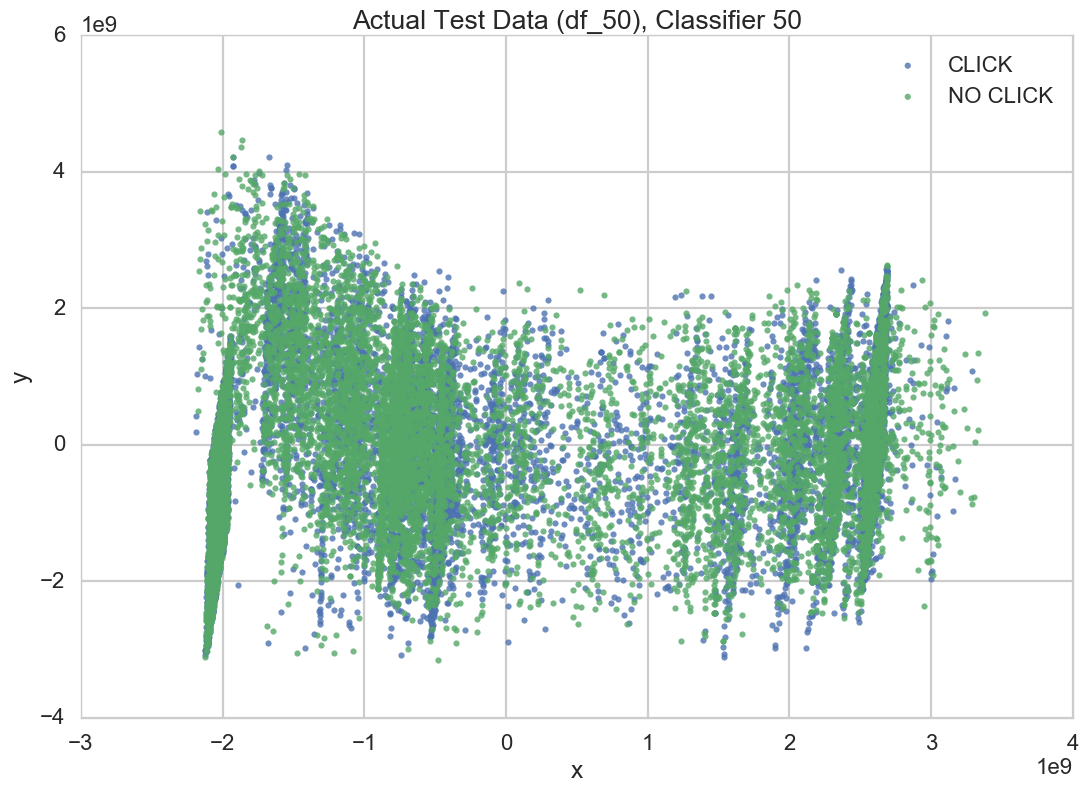

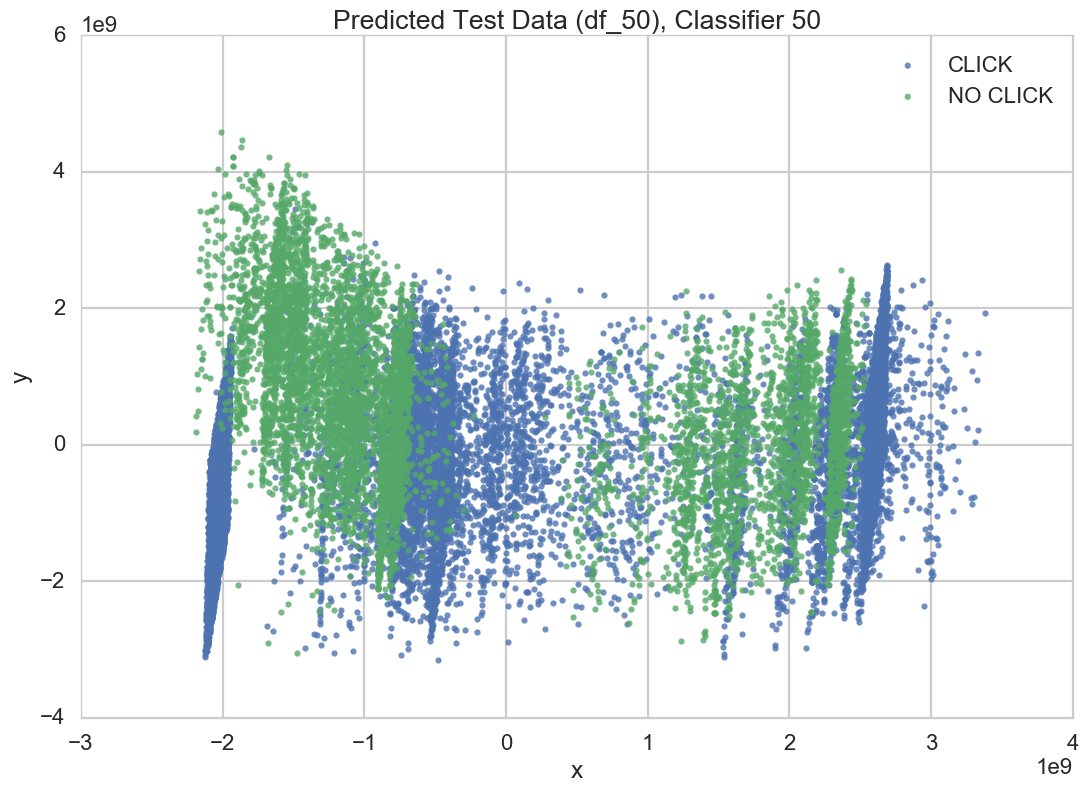

In [25]:
pu.plot_distribution(Xtestlr, ytestlr, clf_lr_50, predicted=False, title="Actual Test Data (df_50), Classifier 50")
pu.plot_distribution(Xtestlr, ytestlr, clf_lr_50, predicted=True, title="Predicted Test Data (df_50), Classifier 50")

#### LR33 Data Projection:

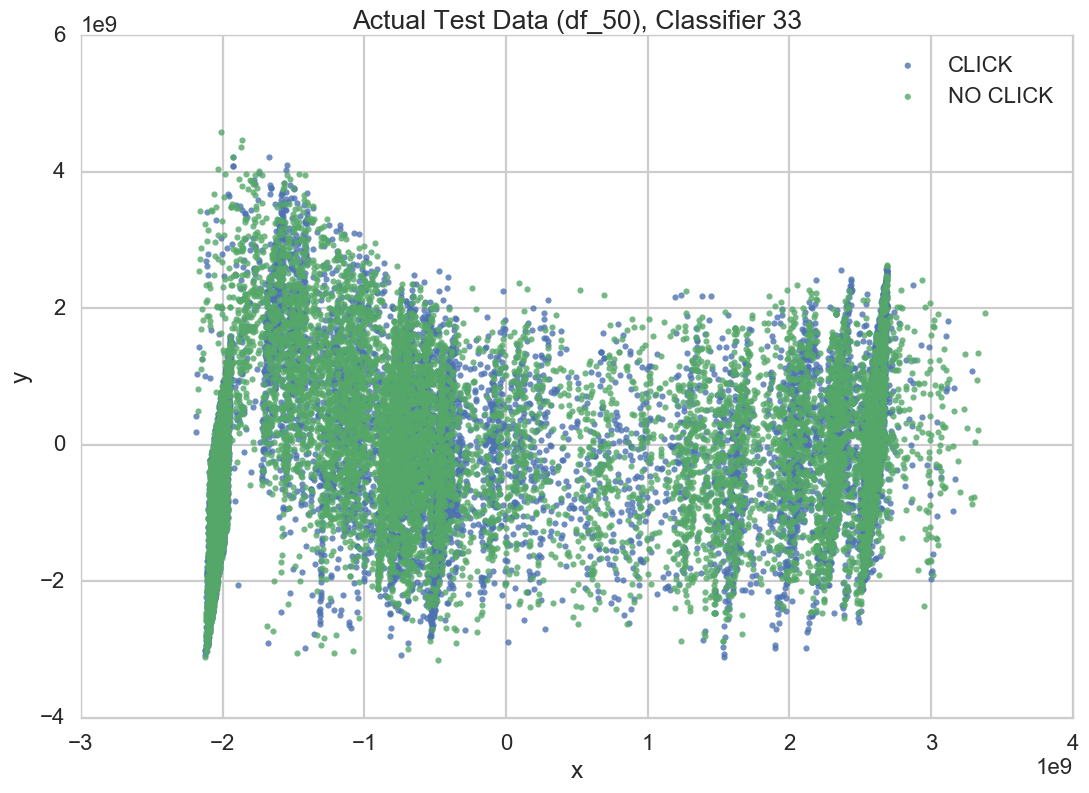

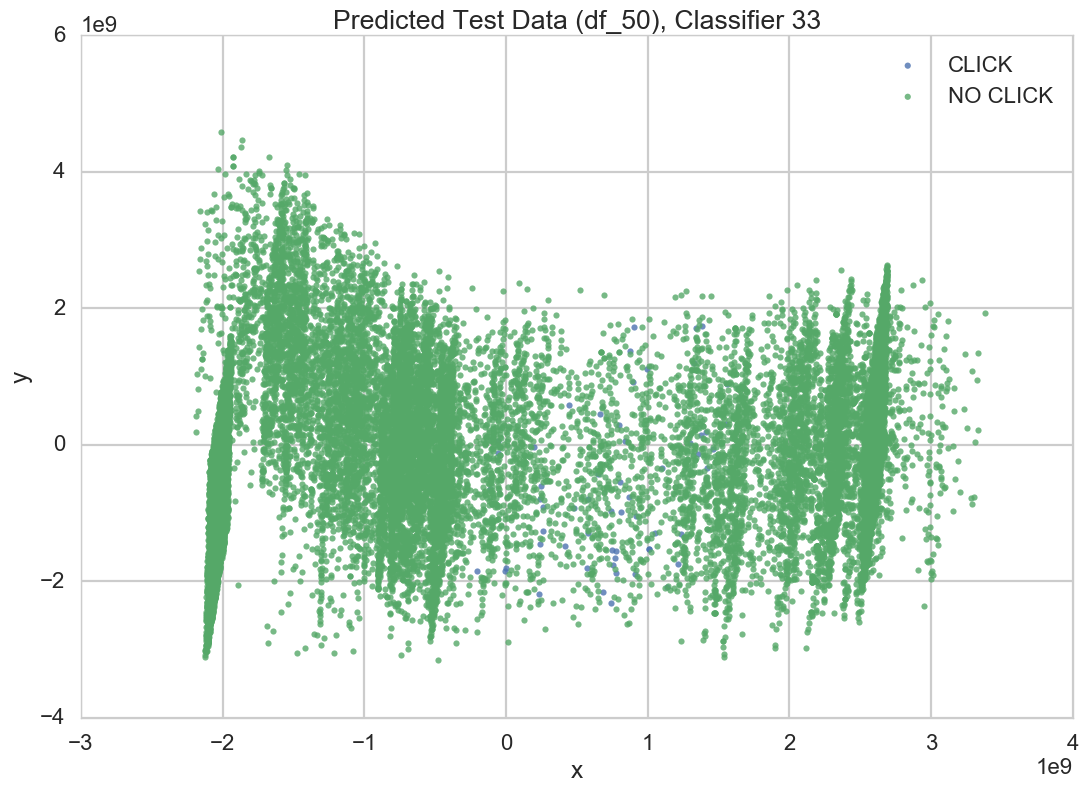

In [26]:
pu.plot_distribution(Xtestlr, ytestlr, clf_lr_33, predicted=False, title="Actual Test Data (df_50), Classifier 33")
pu.plot_distribution(Xtestlr, ytestlr, clf_lr_33, predicted=True,  title="Predicted Test Data (df_50), Classifier 33")

#### LR20 Data Projection:

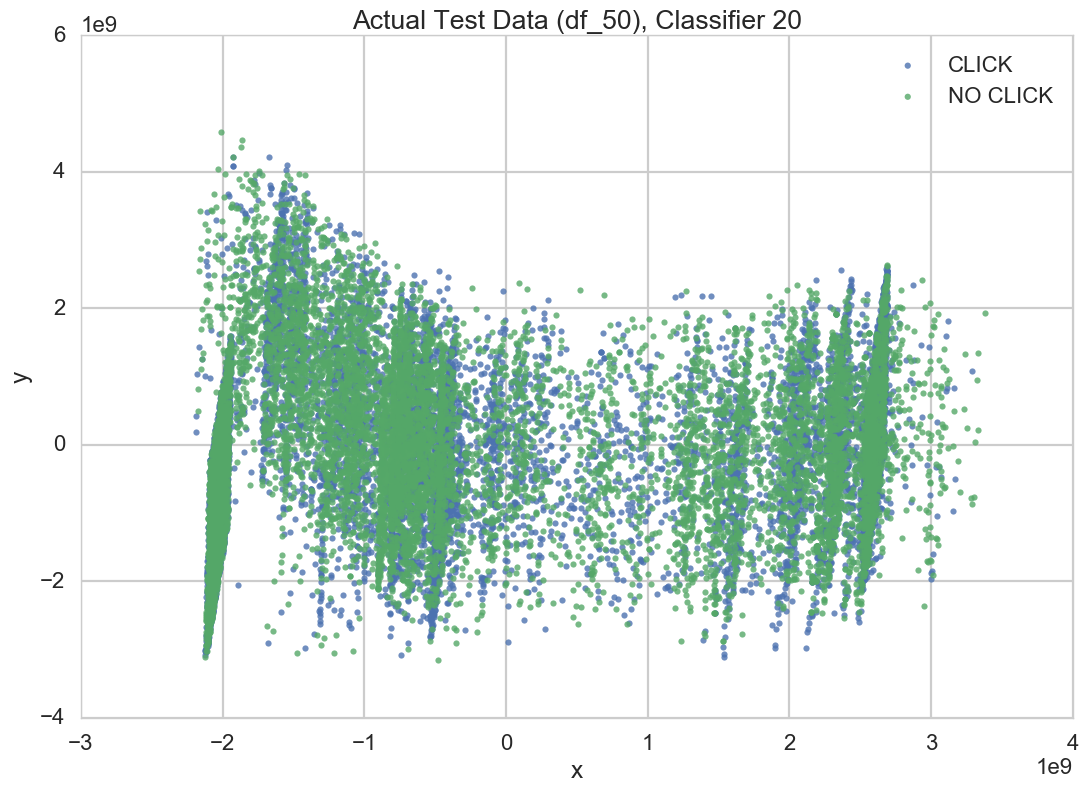

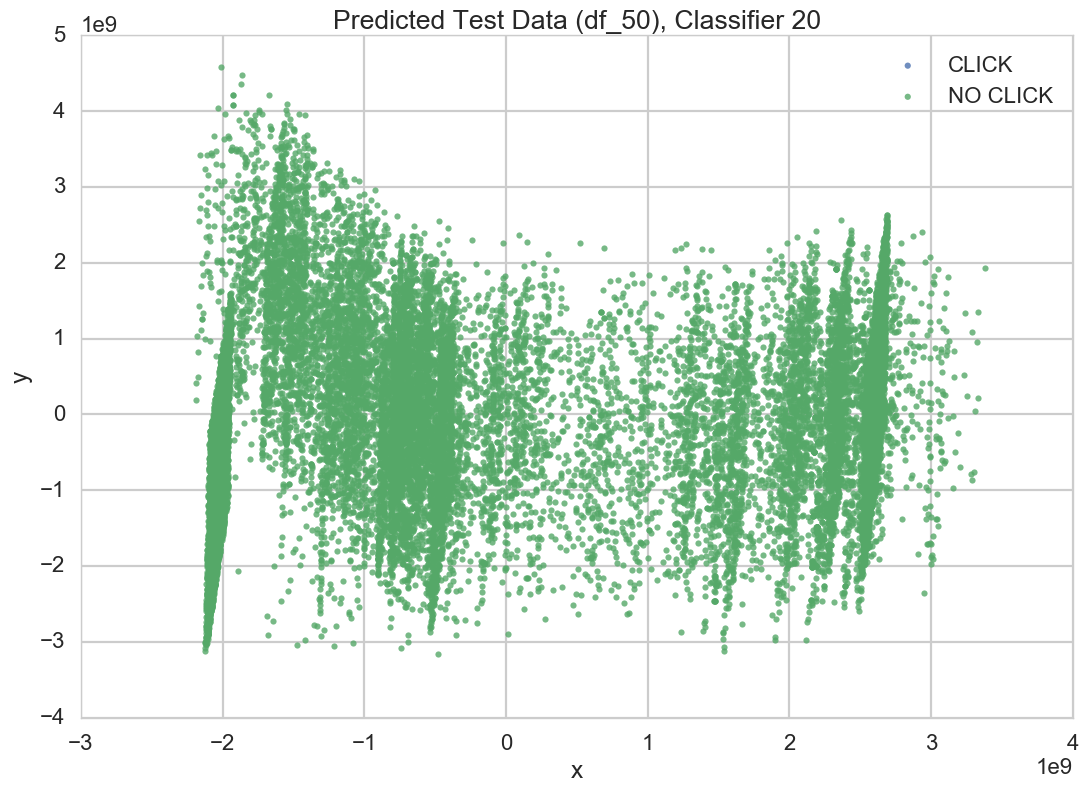

In [27]:
pu.plot_distribution(Xtestlr, ytestlr, clf_lr_20, predicted=False,  title="Actual Test Data (df_50), Classifier 20")
pu.plot_distribution(Xtestlr, ytestlr, clf_lr_20, predicted=True,  title="Predicted Test Data (df_50), Classifier 20")

#### Conclusion From LR Plots:

Similar to confusion matrix results, the plots for LR33 and LR20 classifier show that they suffers from the issue off False Positive prediction. However LR50 classifier had some mis-classification and the problem requires something more than simple Logistic Regression.

## LR Calibration Curve:

In [28]:
all_clfs = [(clf_lr_50, 'LR50'),
            (clf_lr_33, 'LR33'),
            (clf_lr_20, 'LR20')]

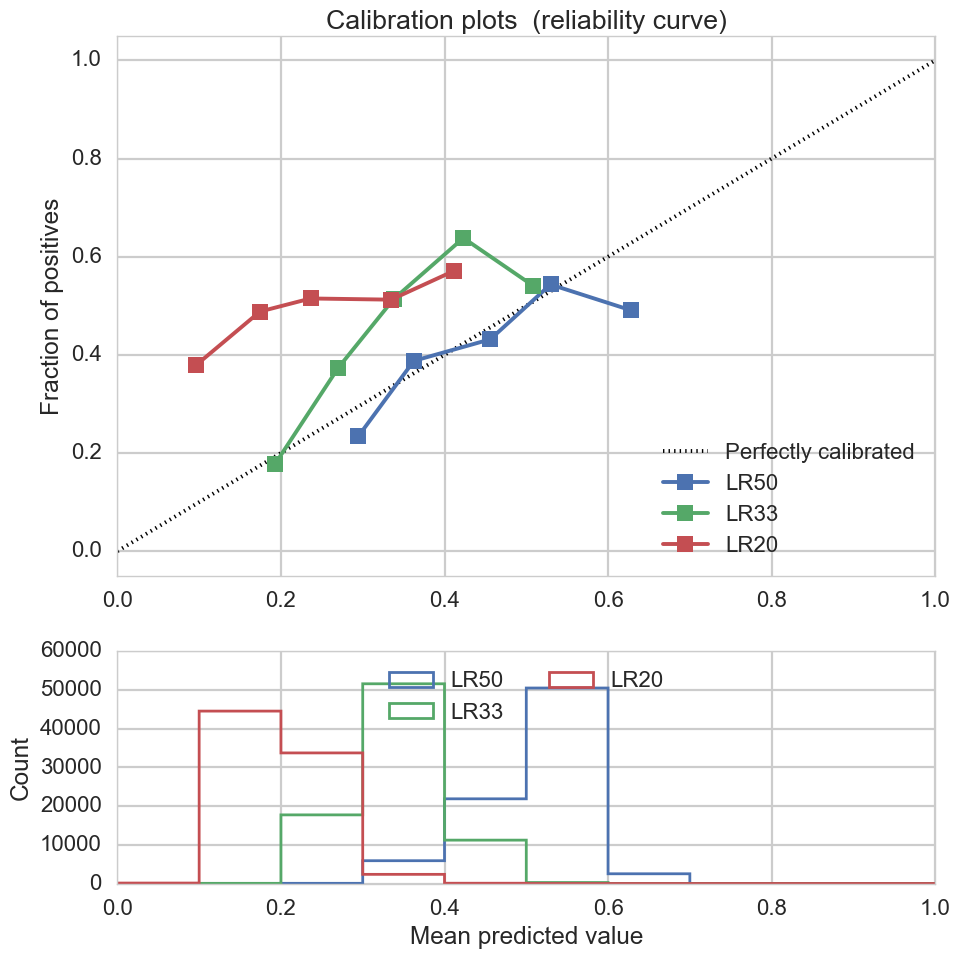

In [31]:
pu.calibration_plot(all_clfs, X50, y50)

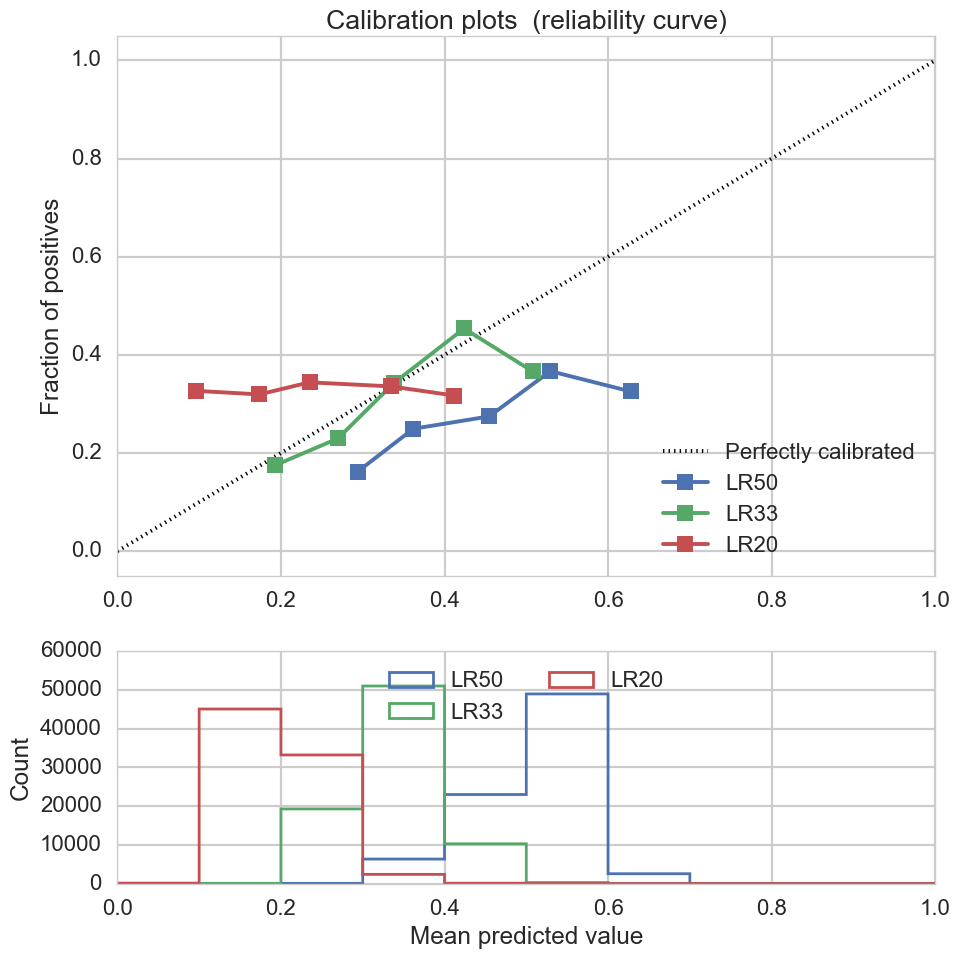

In [32]:
pu.calibration_plot(all_clfs, X33, y33)

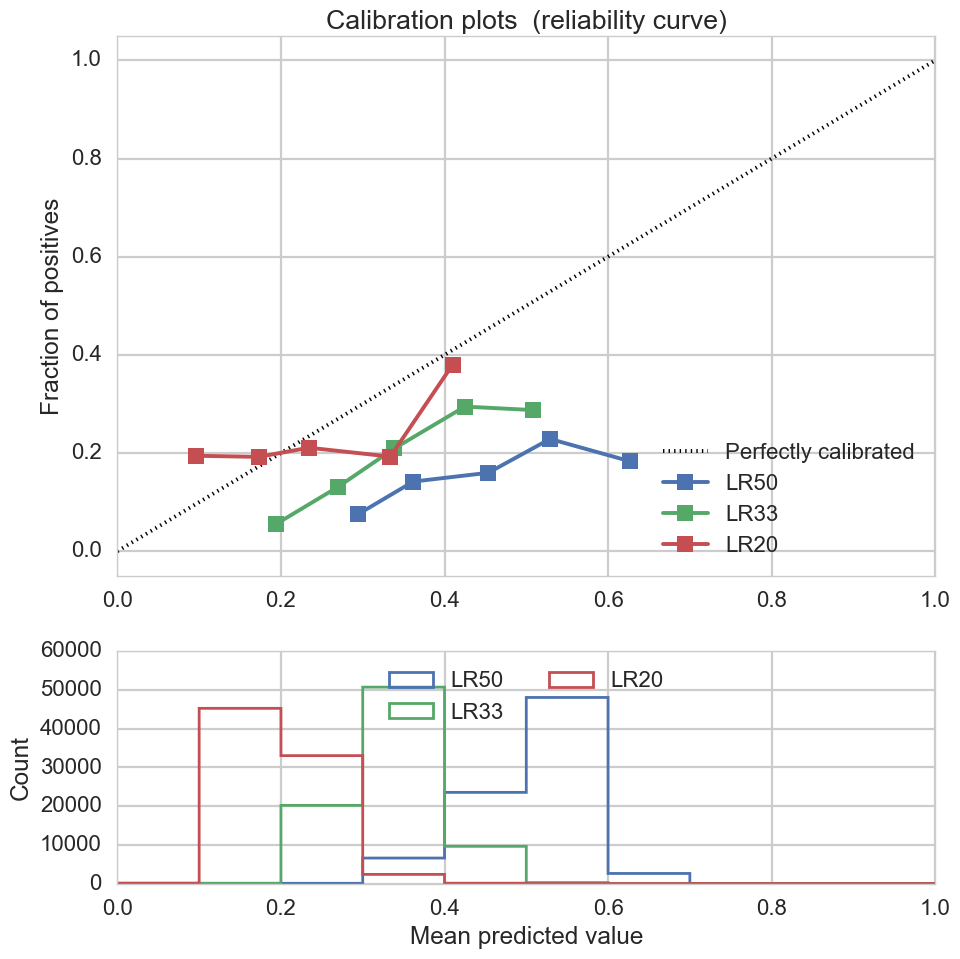

In [33]:
pu.calibration_plot(all_clfs, X20, y20)